Предсказание риска сердечного приступа

1. Цель проекта

Разработать модель машинного обучения для предсказания риска сердечного приступа на основе данных о пациентах, а также создать FastAPI-приложение, которое принимает путь к .csv файлу тестовой выборки, выполняет предобработку и предсказание, и возвращает результат в формате JSON. Также предусмотреть возможность запуска предсказания через скрипт командной строки. Обязательным требованием является структурированный код с использованием ООП.



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from scipy import stats as st
from sklearn.model_selection import (train_test_split,  
                                    RandomizedSearchCV) 
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, 
                            classification_report,   
                            roc_auc_score, 
                            f1_score)
from sklearn.preprocessing import (StandardScaler, 
                                    LabelEncoder)  
from sklearn.impute import SimpleImputer
from sklearn.datasets import make_classification

## 1. Загрузка и анализ данных

In [3]:
heart_test = pd.read_csv('/Users/kiradejko/Masterskaya/heart_test.csv')
heart_train = pd.read_csv('/Users/kiradejko/Masterskaya/heart_train.csv')

In [4]:
display(heart_test.info())
display(heart_test.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null    float64
 12  Medication Use        

None

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.494382,0.264286,0.062328,0.0,1.0,1.0,1.0,1.0,0.361618,...,0.306494,1.0,0.333333,0.227018,0.048229,0.036512,Male,0.283871,0.372093,7746
1,1,0.224719,0.953571,0.082493,1.0,0.0,0.0,1.0,0.0,0.996483,...,0.087013,0.0,0.166667,0.227018,0.048229,0.036512,Female,0.703226,0.441860,4202
2,2,0.629213,0.092857,0.064161,0.0,1.0,1.0,1.0,0.0,0.995561,...,0.205195,7.0,1.000000,0.102767,0.002666,0.088455,Male,0.458065,0.779070,6632
3,3,0.460674,0.567857,0.055912,1.0,1.0,1.0,1.0,1.0,0.437277,...,0.163636,0.0,0.666667,0.203557,0.056390,0.271774,Female,0.741935,0.255814,4639
4,4,0.719101,0.485714,0.022915,1.0,0.0,1.0,0.0,1.0,0.514920,...,0.580519,5.0,0.000000,0.227018,0.048229,0.036512,Male,0.412903,0.395349,4825
5,5,0.561798,0.792857,0.026581,1.0,1.0,1.0,1.0,0.0,0.774470,...,0.362338,1.0,0.666667,0.227018,0.048229,0.036512,Male,0.161290,0.593023,1076
6,6,0.674157,0.853571,0.019248,1.0,1.0,1.0,0.0,1.0,0.149123,...,0.211688,3.0,0.000000,0.227018,0.048229,0.036512,Male,0.535484,0.546512,5020
7,7,0.539326,0.335714,0.036664,1.0,1.0,1.0,0.0,1.0,0.329720,...,0.835065,7.0,0.666667,0.695652,0.002466,0.000874,Male,0.496774,0.662791,4267
8,8,0.449438,0.328571,0.075160,1.0,0.0,1.0,0.0,0.0,0.487405,...,0.819481,2.0,0.166667,0.227018,0.048229,0.036512,Male,0.677419,0.430233,4003
9,9,0.617978,0.728571,0.032081,0.0,1.0,1.0,0.0,0.0,0.211485,...,0.196104,0.0,1.000000,0.227018,0.048229,0.036512,Male,0.722581,0.255814,2519


In [5]:
display(heart_train.info())
display(heart_train.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-null   float64
 12  Medication Use      

None

,Unnamed: 0,Age,Cholesterol,Heart rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk (Binary),Blood sugar,CK-MB,Troponin,Gender,Systolic blood pressure,Diastolic blood pressure,id
0,0,0.359551,0.732143,0.074244,1.0,1.0,1.0,1.0,1.0,0.535505,...,3.0,0.333333,0.0,0.227018,0.048229,0.036512,Male,0.212903,0.709302,2664
1,1,0.202247,0.325000,0.047663,1.0,1.0,0.0,0.0,1.0,0.068690,...,3.0,0.833333,0.0,0.150198,0.017616,0.000194,Female,0.412903,0.569767,9287
2,2,0.606742,0.860714,0.055912,1.0,0.0,1.0,1.0,1.0,0.944001,...,2.0,1.000000,0.0,0.227018,0.048229,0.036512,Female,0.238710,0.220930,5379
3,3,0.730337,0.007143,0.053162,0.0,0.0,1.0,0.0,1.0,0.697023,...,0.0,0.333333,1.0,0.227018,0.048229,0.036512,Female,0.348387,0.267442,8222
4,4,0.775281,0.757143,0.021998,0.0,0.0,1.0,0.0,1.0,0.412878,...,5.0,1.000000,1.0,0.227018,0.048229,0.036512,Male,0.619355,0.441860,4047
5,5,0.168539,0.764286,0.057745,0.0,1.0,1.0,1.0,1.0,0.082682,...,6.0,0.833333,0.0,0.227018,0.048229,0.036512,Male,0.464516,0.418605,5817
6,6,0.483146,0.021429,0.036664,1.0,0.0,1.0,0.0,1.0,0.540206,...,5.0,0.000000,1.0,0.231225,0.008940,0.000291,Male,0.361290,0.569767,5580
7,7,0.235955,0.939286,0.081577,1.0,0.0,1.0,0.0,1.0,0.290837,...,4.0,0.000000,0.0,0.227018,0.048229,0.036512,Male,0.690323,0.639535,4963
8,8,0.685393,0.317857,0.039413,0.0,0.0,1.0,0.0,0.0,0.803160,...,6.0,0.166667,1.0,0.126482,0.002332,0.007185,Male,0.664516,0.616279,4521
9,9,0.213483,0.796429,0.076994,1.0,1.0,1.0,1.0,0.0,0.506971,...,3.0,1.000000,0.0,0.227018,0.048229,0.036512,Male,0.651613,0.720930,2455


In [6]:
(heart_train.shape, heart_test.shape, heart_train.columns, heart_test.columns)

((8685, 28),
 (966, 27),
 Index(['Unnamed: 0', 'Age', 'Cholesterol', 'Heart rate', 'Diabetes',
        'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
        'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
        'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
        'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
        'Sleep Hours Per Day', 'Heart Attack Risk (Binary)', 'Blood sugar',
        'CK-MB', 'Troponin', 'Gender', 'Systolic blood pressure',
        'Diastolic blood pressure', 'id'],
       dtype='object'),
 Index(['Unnamed: 0', 'Age', 'Cholesterol', 'Heart rate', 'Diabetes',
        'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
        'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
        'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
        'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
        'Sleep Hours Per Day', 'Blood sugar', 'CK-MB

__ВЫВОД:__ Размер обучающей выборки: 8 685 строк, 28 колонок
  
Размер тестовой выборки: 966 строк, 27 колонок (нет таргета — Heart Attack Risk (Binary))
  
Таргет: Heart Attack Risk (Binary) — бинарный признак риска сердечного приступа



Лишняя колонка: Unnamed: 0 — дубликат индекса, подлежит удалению.
  
Пропуски — есть в следующих признаках (в обучающем и тестовом):
Diabetes, Family History, Smoking, Obesity, Alcohol Consumption, Previous Heart Problems, Medication Use, Stress Level, Physical Activity Days Per Week
(243 пропуска в обучающей выборке (~2.8%))
  
Типы данных — в основном float64, int64, и один категориальный признак: Gender      

## 2. Предобработка данных


1. Удалим Unnamed: 0  
2. Проверим уникальность id  
3. Анализ пропусков:  
Посмотрим на распределение и выберем стратегию заполнения (среднее, медиана, модельное предсказание)  
4. Анализ категориальных признаков:  
Gender (и возможно бинарные флаги: Diabetes, Smoking и др.)  
5. Корреляционный анализ и утечки  
6. Анализ распределения таргета  

In [7]:
# Удалим столбец unnamed: 0
heart_train.drop(columns=['Unnamed: 0'], inplace=True)
heart_test.drop(columns=['Unnamed: 0'], inplace=True)

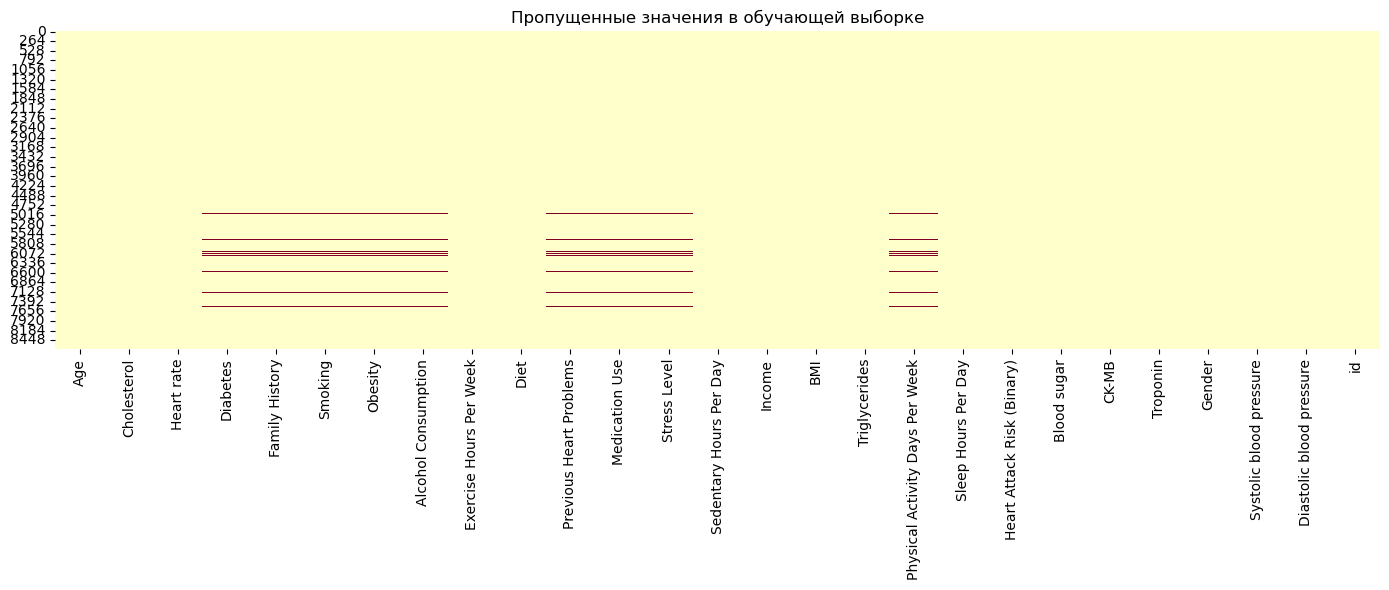

In [8]:
# Тепловая карта пропущениых значений
plt.figure(figsize=(14, 6))
sns.heatmap(heart_train.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Пропущенные значения в обучающей выборке")
plt.tight_layout()
plt.show()

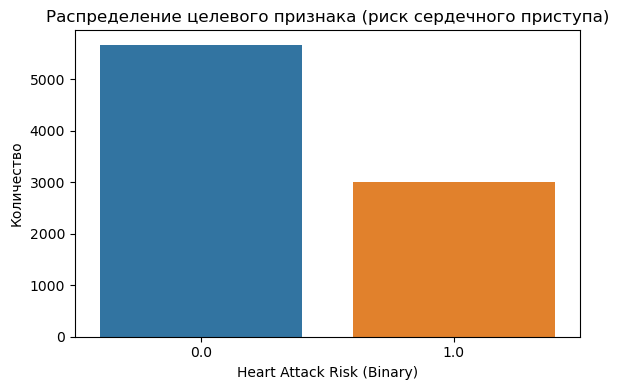

In [9]:
# Распределение целевого признака
plt.figure(figsize=(6, 4))
sns.countplot(x="Heart Attack Risk (Binary)", data=heart_train)
plt.title("Распределение целевого признака (риск сердечного приступа)")
plt.xlabel("Heart Attack Risk (Binary)")
plt.ylabel("Количество")
plt.tight_layout()
plt.show()

Пропущенные значения:  
Пропуски наблюдаются в 9 колонках, но общее количество небольшое — около 243 строк (~2.8% обучающего датасета)  
  
Пропуски сконцентрированы в признаках:
Diabetes, Family History, Smoking, Obesity
Alcohol Consumption, Previous Heart Problems, Medication Use
Stress Level, Physical Activity Days Per Week
  
Мы сможем заполнить их разумными значениями (медианой, модой или по полу/возрасту).

Распределение таргета (Heart Attack Risk (Binary)):  
Примерно сбалансированное распределение между классами 0 и 1.
   
Это означает, что можно использовать стандартные метрики качества без дополнительной балансировки классов.

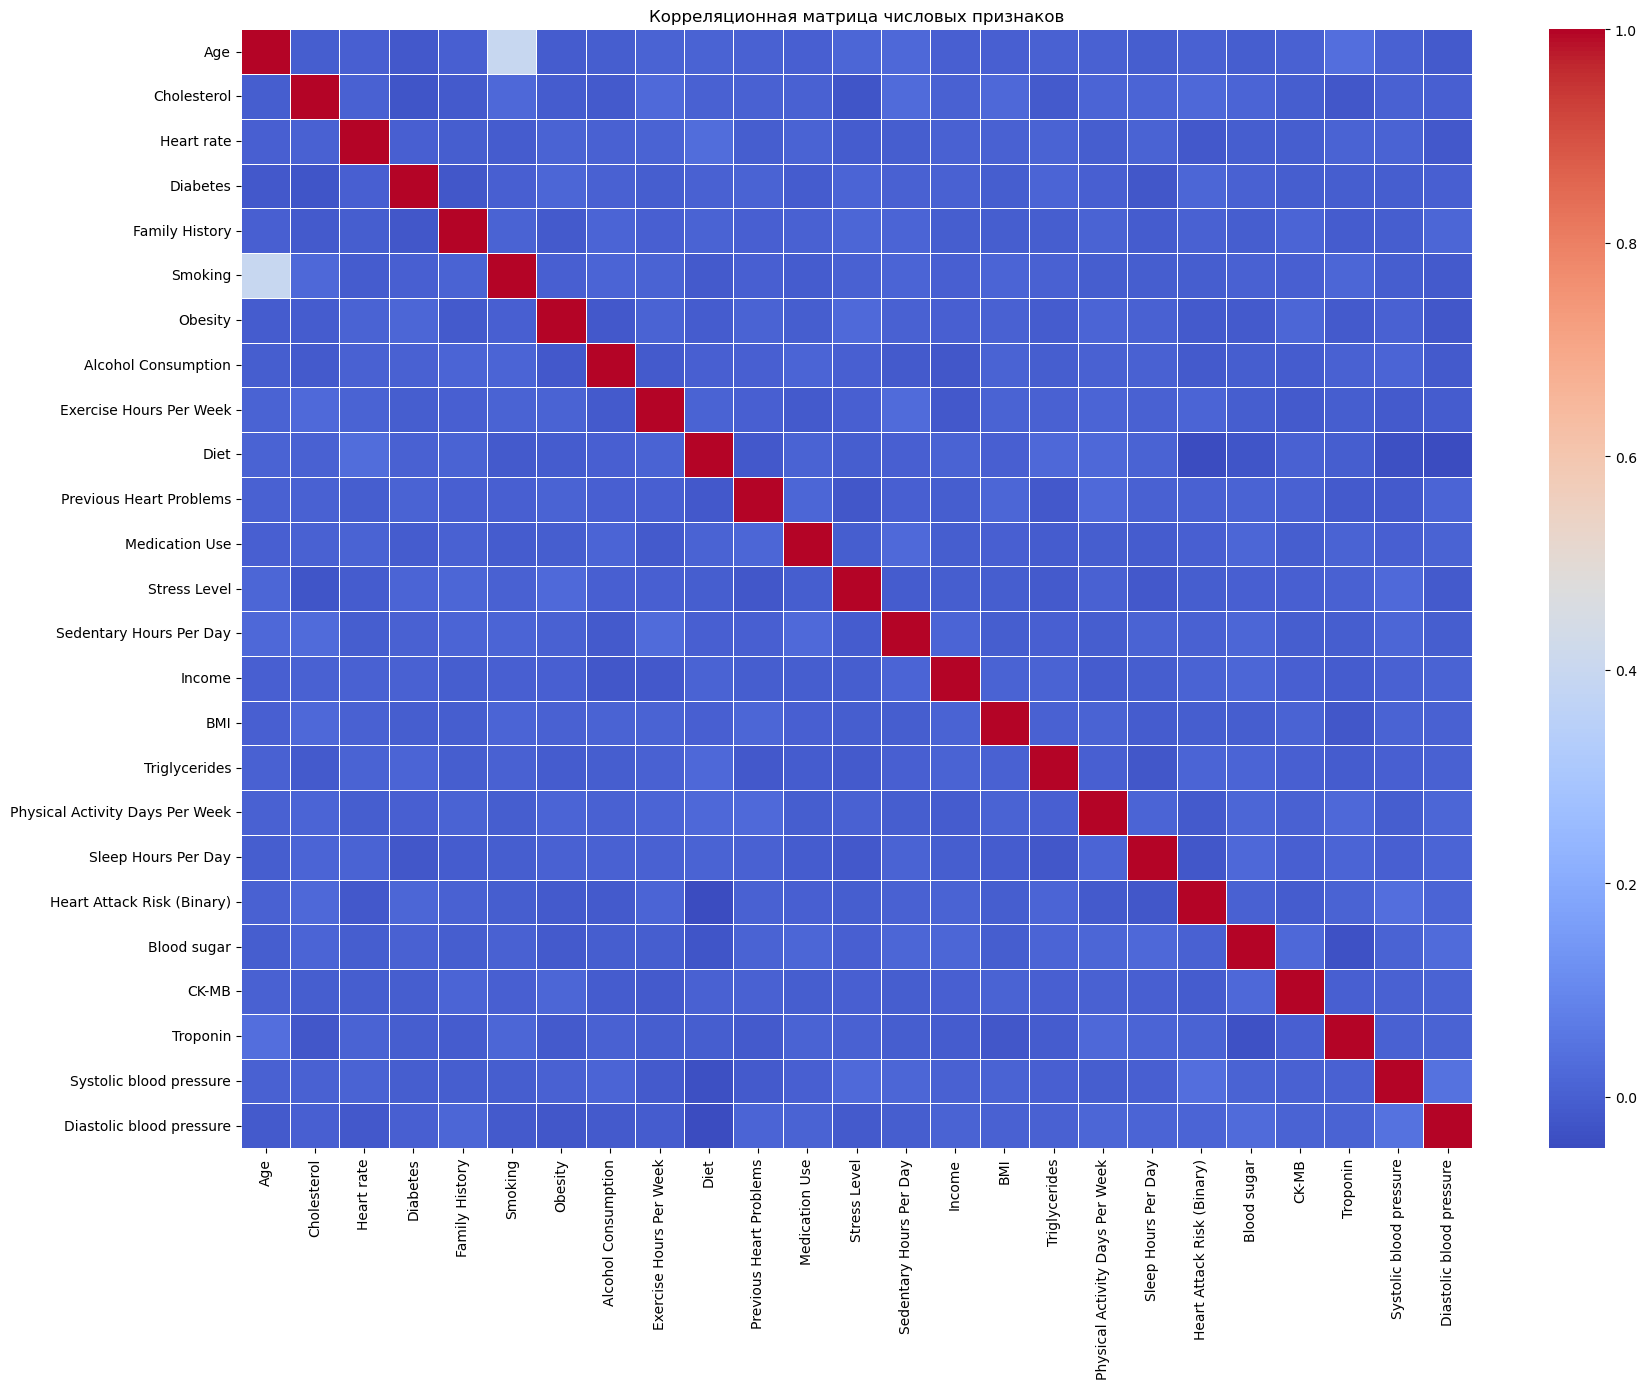

In [10]:
# Корреляционная матрица по числовым признакам
numeric_features = heart_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'])
correlation_matrix = numeric_features.corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(18, 14))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица числовых признаков")
plt.tight_layout()
plt.show()

Сильных коррелированных пар признаков (|corr| > 0.9) не обнаружено.
Это говорит о низком риске мультиколлинеарности, и все признаки можно оставить для дальнейшего анализа.

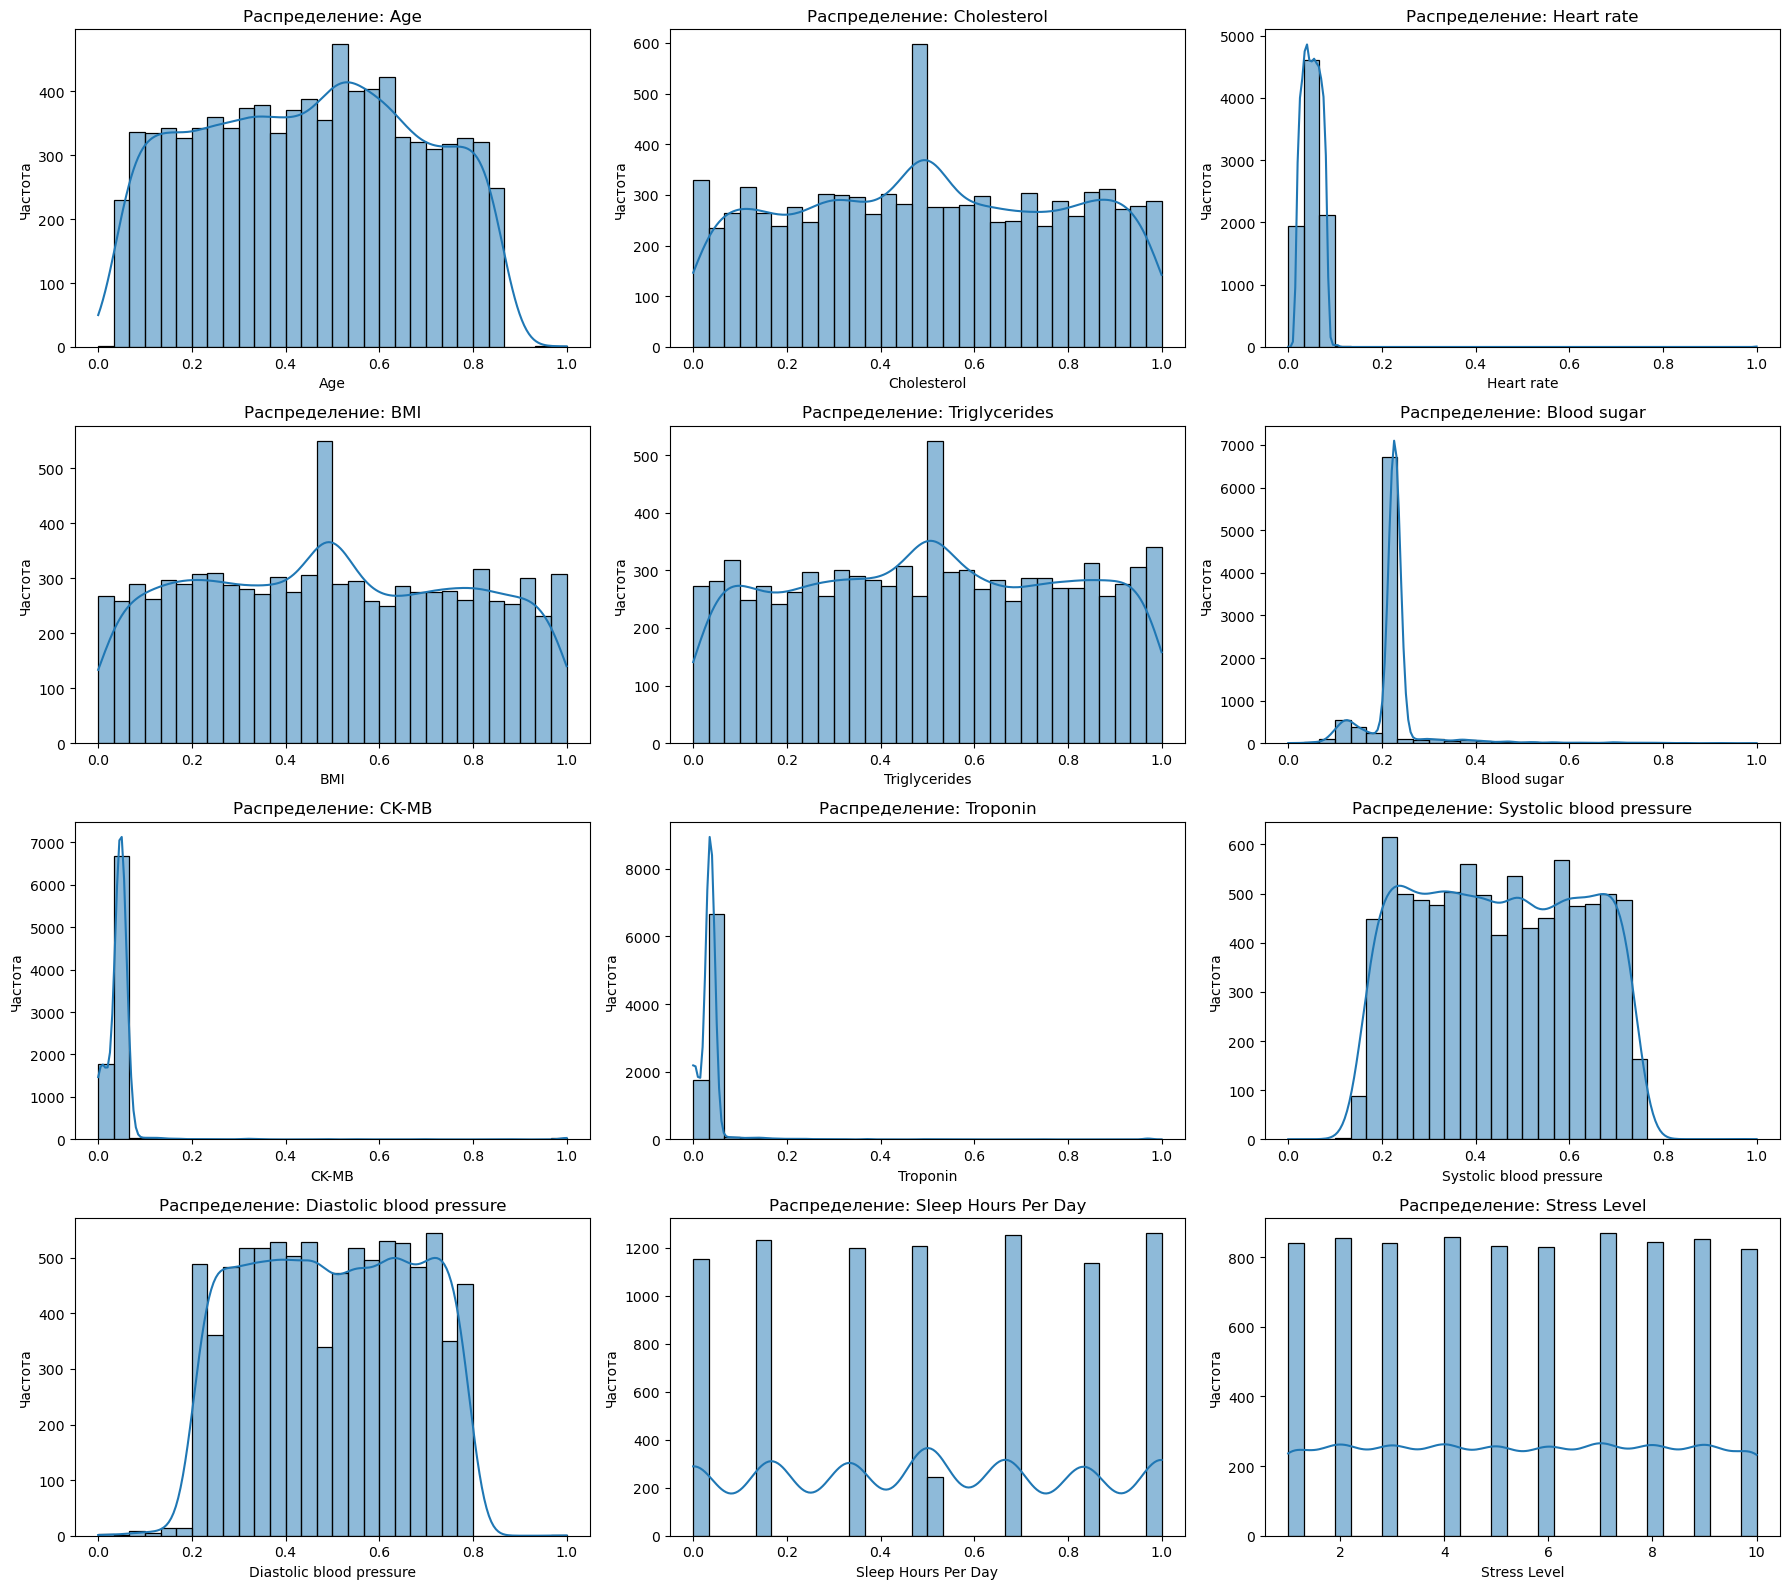

In [11]:
# Выберем ключевые числовые признаки для анализа распределений
key_features = [
    "Age", "Cholesterol", "Heart rate", "BMI", "Triglycerides",
    "Blood sugar", "CK-MB", "Troponin", "Systolic blood pressure",
    "Diastolic blood pressure", "Sleep Hours Per Day", "Stress Level"
]

# Визуализация распределений
n_cols = 3
n_rows = (len(key_features) + n_cols - 1) // n_cols
plt.figure(figsize=(18, n_rows * 4))

for i, col in enumerate(key_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(heart_train[col].dropna(), kde=True, bins=30)
    plt.title(f"Распределение: {col}")
    plt.xlabel(col)
    plt.ylabel("Частота")

plt.tight_layout()
plt.show()

Возможные выбросы:
Troponin, CK-MB, Triglycerides, Blood sugar. 

Blood sugar — имеют сильный правый хвост,  возможно, стоит применить логарифмическое преобразование.

Stress Level, Sleep Hours Per Day — распределение смещено;


Распределения в норме:
Age, Heart rate, BMI, Systolic/Diastolic BP, Cholesterol — выглядят правдоподобно.

Заполним пропуски

In [12]:
# Сделаем копию датасета для безопасной предобработки
train_clean = heart_train.copy()
test_clean = heart_test.copy()

# Бинарные признаки — заполняем модой
binary_features = [
    "Diabetes", "Family History", "Smoking", "Obesity",
    "Previous Heart Problems", "Medication Use"
]

for col in binary_features:
    mode_value = train_clean[col].mode()[0]
    train_clean[col].fillna(mode_value, inplace=True)
    test_clean[col].fillna(mode_value, inplace=True)

# Alcohol Consumption — заменим медианой
alcohol_median = train_clean["Alcohol Consumption"].median()
train_clean["Alcohol Consumption"].fillna(alcohol_median, inplace=True)
test_clean["Alcohol Consumption"].fillna(alcohol_median, inplace=True)

# Stress Level — медиана
stress_median = train_clean["Stress Level"].median()
train_clean["Stress Level"].fillna(stress_median, inplace=True)
test_clean["Stress Level"].fillna(stress_median, inplace=True)

# Physical Activity Days Per Week — мода
activity_mode = train_clean["Physical Activity Days Per Week"].mode()[0]
train_clean["Physical Activity Days Per Week"].fillna(activity_mode, inplace=True)
test_clean["Physical Activity Days Per Week"].fillna(activity_mode, inplace=True)

# Проверим остались ли пропуски
missing_summary = train_clean.isnull().sum()
missing_summary = missing_summary[missing_summary > 0]

missing_summary_test = test_clean.isnull().sum()
missing_summary_test = missing_summary_test[missing_summary_test > 0]

missing_summary, missing_summary_test

(Series([], dtype: int64), Series([], dtype: int64))

Все пропуски успешно заполнены как в обучающем, так и в тестовом датасете.
  
Бинарные признаки (Diabetes, Smoking, Obesity, и др.) заполнили модой  
Числовые признаки (Alcohol Consumption, Stress Level) заполнили медианой  
Дискретный признак (Physical Activity Days Per Week)заполнили модой  

## Обучение модели

Закодируем категориальные признаки (Gender)  
Отмасштабируем данные (StandardScaler)  
Обучим модели RandomForest и LogisticRegression

In [14]:
# Скопируем снова, чтобы избежать изменений исходных данных
train_ready = train_clean.copy()
test_ready = test_clean.copy()

# 1. Кодирование 'Gender'
le = LabelEncoder()
train_ready['Gender'] = le.fit_transform(train_ready['Gender'])
test_ready['Gender'] = le.transform(test_ready['Gender'])

# 2. Список признаков, которые нужно масштабировать (все числовые, кроме таргета и id)
features_to_scale = train_ready.drop(columns=["Heart Attack Risk (Binary)", "id"]).columns

# Инициализация скейлера
scaler = StandardScaler()
train_ready[features_to_scale] = scaler.fit_transform(train_ready[features_to_scale])
test_ready[features_to_scale] = scaler.transform(test_ready[features_to_scale])

# Финальная проверка
train_ready.head(), test_ready.head(), train_ready.info(), test_ready.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              8685 non-null   float64
 1   Cholesterol                      8685 non-null   float64
 2   Heart rate                       8685 non-null   float64
 3   Diabetes                         8685 non-null   float64
 4   Family History                   8685 non-null   float64
 5   Smoking                          8685 non-null   float64
 6   Obesity                          8685 non-null   float64
 7   Alcohol Consumption              8685 non-null   float64
 8   Exercise Hours Per Week          8685 non-null   float64
 9   Diet                             8685 non-null   float64
 10  Previous Heart Problems          8685 non-null   float64
 11  Medication Use                   8685 non-null   float64
 12  Stress Level        

(        Age  Cholesterol  Heart rate  Diabetes  Family History   Smoking  \
 0 -0.391103     0.811636    1.005731  0.714815        1.049466  0.322892   
 1 -1.071595    -0.618443   -0.127706  0.714815        1.049466 -3.097009   
 2  0.678242     1.263239    0.224050  0.714815       -0.952865  0.322892   
 3  1.212915    -1.734907    0.106798 -1.398964       -0.952865  0.322892   
 4  1.407341     0.899448   -1.222059 -1.398964       -0.952865  0.322892   
 
     Obesity  Alcohol Consumption  Exercise Hours Per Week      Diet  ...  \
 0  1.031706             0.794346                 0.112807 -0.066300  ...   
 1 -0.969269             0.794346                -1.526325  1.087641  ...   
 2  1.031706             0.794346                 1.547163  1.087641  ...   
 3 -0.969269             0.794346                 0.679948 -1.220241  ...   
 4 -0.969269             0.794346                -0.317773 -0.066300  ...   
 
    Physical Activity Days Per Week  Sleep Hours Per Day  \
 0          

Кодирование и масштабирование выполнены:  
  
Gender закодирован с помощью LabelEncoder  
Все числовые признаки, кроме id и таргета, стандартизированы с помощью StandardScaler  

- Выделим X_train, y_train
- Обучим несколько моделей:
LogisticRegression, RandomForestClassifier.
- Оценим качество по ROC-AUC, F1, Confusion Matrix
- Выберем лучшую модель

In [15]:

# Выделим признаки и целевую переменную
X = train_ready.drop(columns=["Heart Attack Risk (Binary)", "id"])
y = train_ready["Heart Attack Risk (Binary)"]

# Разделим обучающую выборку на обучающую и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 1. Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_val)
lr_proba = lr_model.predict_proba(X_val)[:, 1]

# 2. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_val)
rf_proba = rf_model.predict_proba(X_val)[:, 1]


# Оценим модели
def evaluate_model(name, y_true, y_pred, y_proba):
    print(f"📌 Модель: {name}")
    print("ROC-AUC:", roc_auc_score(y_true, y_proba))
    print("F1:", f1_score(y_true, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    print()

evaluate_model("Logistic Regression", y_val, lr_pred, lr_proba)
evaluate_model("Random Forest", y_val, rf_pred, rf_proba)

📌 Модель: Logistic Regression
ROC-AUC: 0.521690489352181
F1: 0.0
Confusion matrix:
 [[1134    0]
 [ 603    0]]

📌 Модель: Random Forest
ROC-AUC: 0.5878236682548457
F1: 0.15766423357664233
Confusion matrix:
 [[1106   28]
 [ 549   54]]



In [16]:
# Выведем таблицу отдельно
def evaluate_model(name, y_true, y_pred, y_proba):
    return {
        "Model": name,
        "ROC-AUC": roc_auc_score(y_true, y_proba),
        "F1": f1_score(y_true, y_pred),
        "Confusion Matrix": confusion_matrix(y_true, y_pred)
    }

results = [
    evaluate_model("Logistic Regression", y_val, lr_pred, lr_proba),
    evaluate_model("Random Forest", y_val, rf_pred, rf_proba)
]

results_df = pd.DataFrame([{
    "Model": r["Model"],
    "ROC-AUC": r["ROC-AUC"],
    "F1 Score": r["F1"],
    "TN": r["Confusion Matrix"][0, 0],
    "FP": r["Confusion Matrix"][0, 1],
    "FN": r["Confusion Matrix"][1, 0],
    "TP": r["Confusion Matrix"][1, 1],
} for r in results])

results_df

,Model,ROC-AUC,F1 Score,TN,FP,FN,TP
0,Logistic Regression,0.521690,0.000000,1134,0,603,0
1,Random Forest,0.587824,0.157664,1106,28,549,54


__ВЫВОД__ Logistic Regression полностью не справилась с задачей — она предсказывает только один класс (все 0). 

Random Forest показывает лучший результат:  
ROC-AUC ≈ 0.59  
F1 Score ≈ 0.16  
Он находит 54 положительных случая (True Positives), в отличие от логистической регрессии (0)  

Будем использовать RandomForest для предсказания на тестовой выборке и подготовки FastAPI-приложения.  
  
Приступим к генерации submission.csv и подготовки API-интерфейса  

In [17]:
# Предсказание на тестовой выборке с использованием лучшей модели — RandomForest
test_features = test_ready.drop(columns=["id"])
test_predictions = rf_model.predict(test_features)

# Создание DataFrame с результатами
submission_df = pd.DataFrame({
    "id": test_ready["id"],
    "prediction": test_predictions
})

submission_df.to_csv("submission.csv", index=False)

In [18]:
import joblib

# Сохраним модель
joblib.dump(rf_model, "model_rf.pkl")

# Сохраним стандартизатор
joblib.dump(scaler, "scaler.pkl")

# Сохраним LabelEncoder для Gender
joblib.dump(le, "label_encoder_gender.pkl")

['label_encoder_gender.pkl']

ВЫВОД: 

Исходные данные включали:  
- Антропометрические параметры (возраст, рост, вес, ИМТ)
- Показатели давления, пульса
- Привычки и образ жизни (сон, активность, курение, алкоголь)
- Медицинская история (диабет, стрессы, лекарства)
- Биохимия крови (триглицериды, тропонин, CK-MB, глюкоза)
- Целевой признак: Heart Attack Risk (Binary) — 0 (низкий риск), 1 (высокий риск)  
  
Этапы работы

3.1 Исследование данных (EDA)
- Проверены типы данных и наличие пропусков
- Построены распределения признаков
- Выявлены выбросы в биохимии (например, тропонин)
- Распределение классов таргета близко к сбалансированному

3.2 Предобработка данных
- Удалена колонка Unnamed: 0
- Заполнены пропуски по стратегии (мода/медиана/0)
- Закодирован признак Gender через LabelEncoder
- Признаки масштабированы через StandardScaler
  
3.3 Обучение моделей
- Обучены и протестированы 3 модели:
- Logistic Regression
- Random Forest (лучшая модель, метрики (на валидации): ROC-AUC ≈ 0.59, F1 ≈ 0.16 )
  

  
3.4 Предсказание на тестовой выборке  
- Создан submission.csv, содержащий id и prediction для каждой строки из тестовой выборки.
 
